In [7]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

#### Convolution
Each convolution operation has a kernel which could be a any matrix smaller than the original image in height and width. Each kernel is useful for a specific task, such as sharpening, blurring, edge detection, and more. Let's start with the sharpening kernel which is defined in [Types of Kernel](https://en.wikipedia.org/wiki/Kernel_(image_processing).

As previously mentioned, each kernel has a specific task to do and the sharpen kernel accentuate edges but with the cost of adding noise to those area of the image which colors are changing gradually. The output of image convolution is calculated as follows:

1. Flip the kernel both horizontally and vertically. As our selected kernel is symmetric, the flipped kernel is equal to the original.
2. Put the first element of the kernel at every pixel of the image (element of the image matrix). Then each element of the kernel will stand on top of an element of the image matrix.
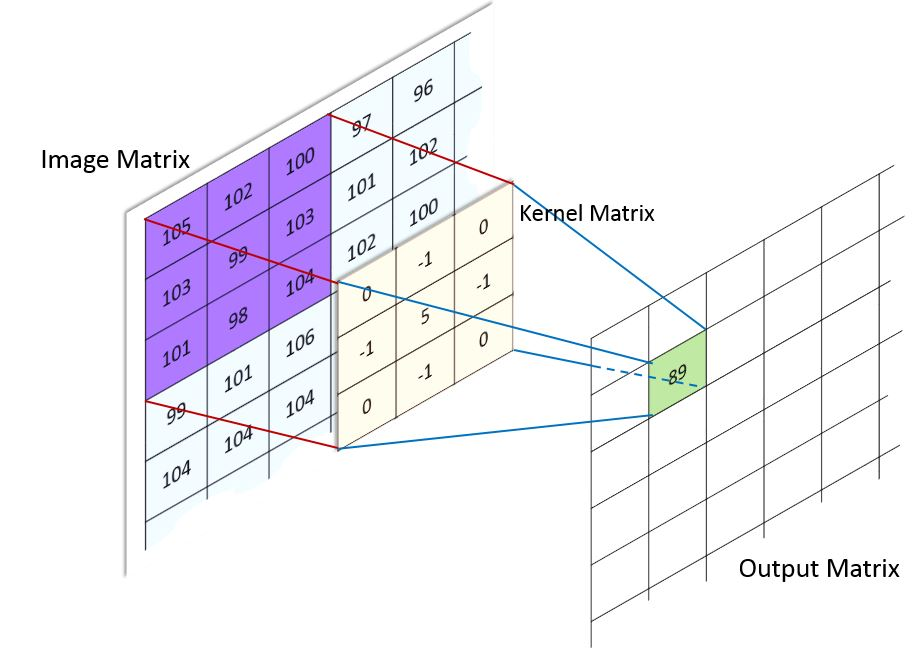
3. Multiply each element of the kernel with its corresponding element of the image matrix (the one which is overlapped with it)
4. Sum up all product outputs and put the result at the same position in the output matrix as the center of kernel in image matrix.
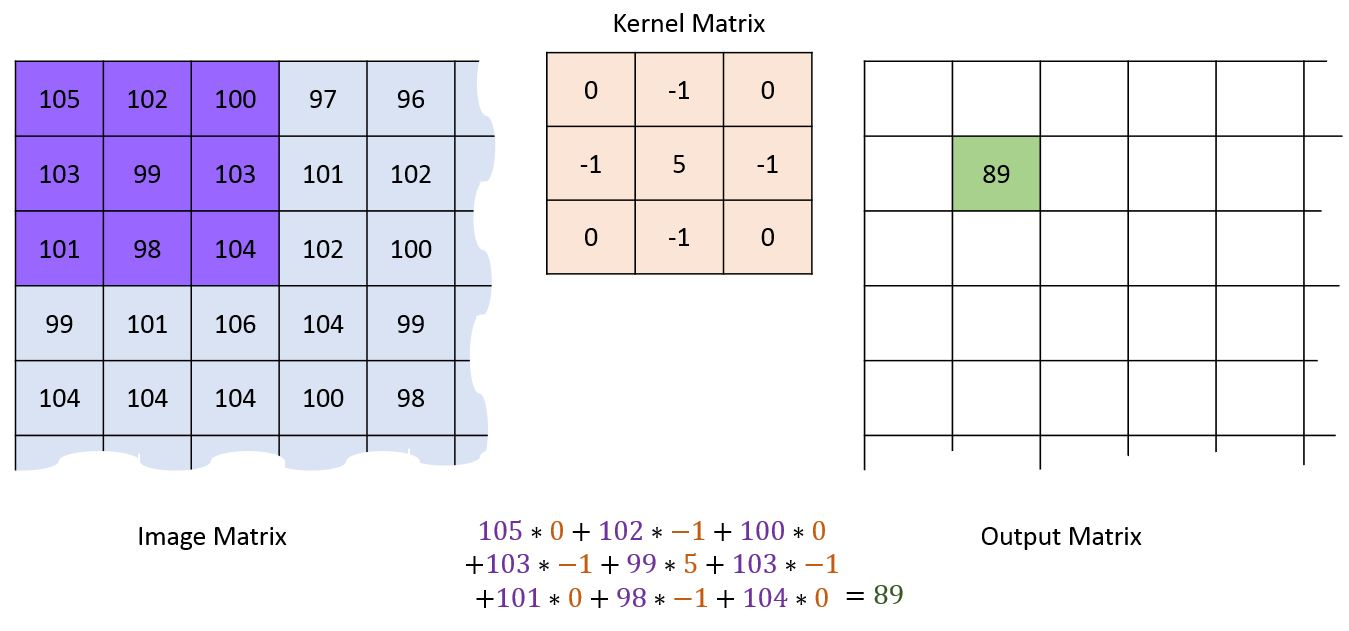
5. For the pixels on the border of image matrix, some elements of the kernel might stands out of the image matrix and therefore does not have any corresponding element from the image matrix. In this case, we can eliminate the convolution operation for these position which end up an output matrix smaller than the input (image matrix) or we can apply padding to the input matrix (based on the size of the kernel we might need one or more pixels padding, in our example we just need 1 pixel padding): 
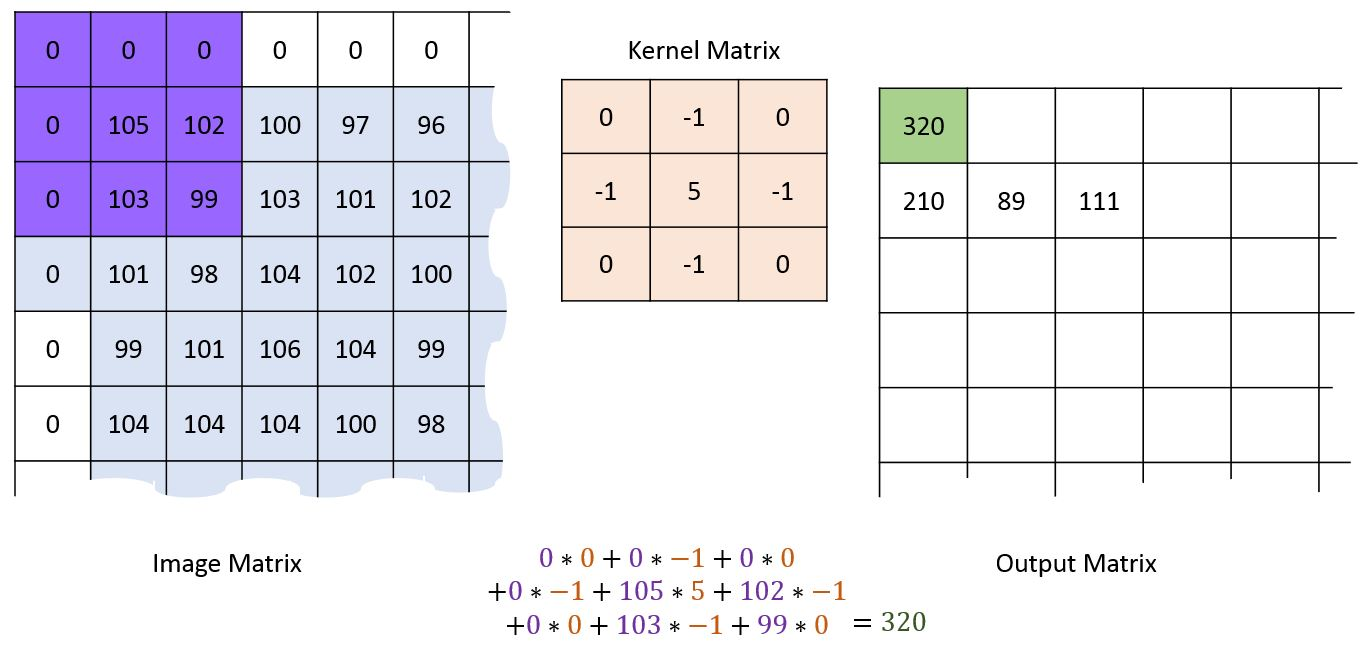
As you can see in Figure 5, the output of convolution might violate the input range of [0-255]. Even though the python packages would take care of it by considering the maximum value of the image as the pure white (correspond to 255 in [0-255] scale) and the minimum value as the pure black (correspond to 0 in [0-255] scale), the values of the convolution output (filtered image) specially along the edges of the image (which are calculated based on the added zero padding) can cause a low contrast filtered image. Here, to overcome this loss of contrast issue, we can use Histogram Equalization technique. However, we might be able to end up with a better contrast neglecting the zero padding. The following python code convolves an image with the sharpen kernel and plots the result:

In [ ]:
def convolve2d_3x3kernel_1padding(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# image_sharpen = convolve2d(input_image, kernel=KERNEL)
# cv2.imwrite('sharpened_image.jpg', image_sharpen)

In [8]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [9]:
def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 78. ... 44.  0.  0.]
 ...
 [ 0.  0. 40. ... 17.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


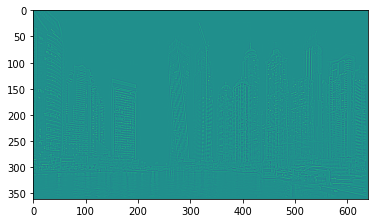

In [15]:
if __name__ == '__main__':
    # Grayscale Image
    image = processImage('Image.jpeg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)
    plt.imshow(output)
#     plt.show()